histo 形式のデータをプロットする。


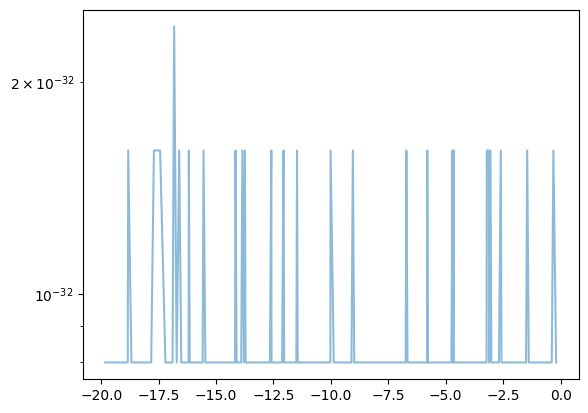

In [7]:
import matplotlib.pyplot as plt
import glob

from loader import loadAHisto

for filename in glob.glob("LJME____.*hedra.histo"):
    h1 = loadAHisto(open(filename))

    X = sorted(h1.keys())
    Y = [h1[x] for x in X]

    plt.plot(X, Y, alpha=0.5)
plt.yscale("log")
plt.show()

エネルギーの刻みが細かすぎる気がする。

これをもう少し粗くしても、結果は変わらないのではないか?


In [7]:
from loader import loadAHisto
from histo2f import fvalue

histo = dict()
for cage in ("12", "14", "16"):
    filename = f"LJME____.{cage}hedra.histo"
    histo[cage] = loadAHisto(open(filename))

for i in range(4):
    f = dict()
    for cage in ("12", "14", "16"):
        f[cage] = fvalue(histo[cage], 273.15)

        # エネルギーの刻みを粗くする
        ticks = sorted(histo[cage].keys())
        histo[cage] = {
            (ticks[i] + ticks[i + 1]) / 2: histo[cage][ticks[i]]
            + histo[cage][ticks[i + 1]]
            for i in range(0, len(ticks) - 1, 2)
        }

    print(f)

{'12': np.float64(140.2267826825602), '14': np.float64(136.97292436272656), '16': np.float64(136.40040993904898)}
{'12': np.float64(140.2284985308481), '14': np.float64(136.97295494706475), '16': np.float64(136.4004276980337)}
{'12': np.float64(140.23313701941635), '14': np.float64(136.97304008272252), '16': np.float64(136.4004280099854)}
{'12': np.float64(140.24644841333108), '14': np.float64(136.97345340954007), '16': np.float64(136.40067157794073)}


サンプル数が少ない小ケージの場合には、bin 幅の影響がでてしまう。むしろ、サンプルを増やすことをまず検討すべきだ。

ほかのサイズでは、bin 幅を 8 倍にしても 1 J/mol の精度が保たれている。
